In [45]:
import pandas as pd
import os
from pathlib import Path
from operator import mul
import csv

In [46]:
def read_classes(classes_csv_path):
    with open(classes_csv_path, mode='r') as csv_file:
        csv_reader = csv.reader(csv_file)
        next(csv_reader, None)
        return {i: r[0] for i, r in enumerate(csv_reader)}

def read_annotations(annotations_csv_path):
    to_secs = lambda t: sum(map(mul, [60, 1], map(int, t.split(':'))))
    return pd.read_csv(annotations_csv_path,
                       usecols=['match_path',
                                'half',
                                'game_time',
                                'label',
                                'position',
                                'team',
                                'visibility'],
                       dtype={'label': int,
                              'position': int,
                              'team': int
                              },
                       converters={'match_path': Path,
                                   'half': lambda h: int(h) - 1,
                                   'game_time': to_secs,
                                   'visibility': lambda v: 1 if int(v) else -1},
                       index_col=['match_path',
                                  'half'])

,label,half,game_time,position,team,visibility,sum
0,Penalty,107,272922,273009162,106,173,173
1,Kick-off,1391,2293768,2294679256,1189,-1160,2566
2,Goal,985,2485670,2486473037,964,1701,1703
3,Substitution,2710,4424604,4425688839,1421,1843,2839
4,Offside,1026,2832580,2833630749,1118,1872,2098
5,Shots on target,3174,8231373,8234284230,3292,5790,5820
6,Shots off target,2702,7362385,7364983923,2852,5228,5256
7,Clearance,3917,10938738,10942629794,3493,-716,7896
8,Ball out of play,15627,42466841,42482711512,63620,29090,31810
9,Throw-in,9108,24925353,24934815664,9634,7978,18918


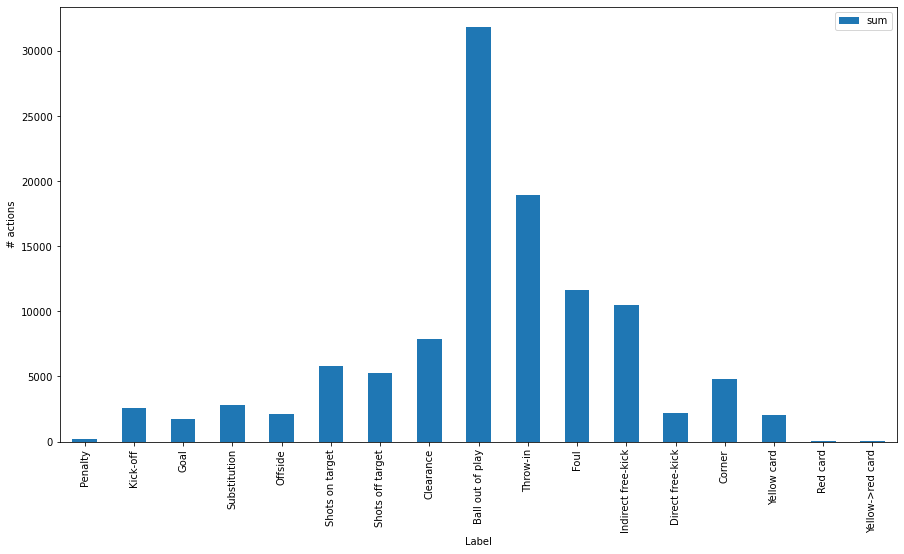

In [51]:
class_path = '../../../../mnt/DATA/datasets/soccernet/classes_v2.csv'
clas = read_classes(class_path)

ann_path = '../../../../mnt/DATA/datasets/soccernet/annotations_v2.csv'
ann = read_annotations(ann_path).reset_index()

ann['sum'] = 1
ann['label'] = ann['label'] - 1
anncount = ann.groupby(['label'], as_index=False).sum()
anncount['label'] = anncount['label'].replace(clas)

anncount.plot(kind='bar', x='label', y='sum', xlabel='Label', ylabel='# actions', figsize=(15,8))
anncount

In [67]:
clas.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])

In [89]:
threshold = 800
balanced_annotations = pd.DataFrame()
for label in clas.keys():
    class_annotations = ann.loc[ann['label']==label]
    if len(class_annotations) > threshold:
        class_annotations = class_annotations.sample(n=threshold, random_state=0)
    balanced_annotations = pd.concat([balanced_annotations, class_annotations])

balanced_annotations['label'].value_counts()

8     800
14    800
2     800
3     800
4     800
5     800
6     800
7     800
1     800
9     800
10    800
11    800
12    800
13    800
0     173
15     55
16     46
Name: label, dtype: int64

In [90]:
clas

{0: 'Penalty',
 1: 'Kick-off',
 2: 'Goal',
 3: 'Substitution',
 4: 'Offside',
 5: 'Shots on target',
 6: 'Shots off target',
 7: 'Clearance',
 8: 'Ball out of play',
 9: 'Throw-in',
 10: 'Foul',
 11: 'Indirect free-kick',
 12: 'Direct free-kick',
 13: 'Corner',
 14: 'Yellow card',
 15: 'Red card',
 16: 'Yellow->red card'}